## Task 2 - Traffic Modelling

### Task 2a - update rule

For this task, you will work on a model of road traffic using discretised cells, which is an example of a larger class of models in computer science called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton). Imagine a road that is divided into a number of cells which can contain only one car. For now, let's assume this road is one-way from left to right. We also discretise time into steps. At each step a car moves to its adjacent right cell if it is empty; otherwise, it stays where it is (see the figure below). 

![](schematicroad.png)

We use a periodic boundary condition such that a car that moves off the right-most cell enters into the left-most cell as shown by the red arrow in the schematic above (if you like you can think of this problem as representing a roundabout rather than a straight section of a road).

You should write a function that finds the position of cars in the next step given their positions in the current step. To do this systematically, we can define the numpy array `R[i,t]` that is 0 if there are no cars in the "`i`" section of the road, and 1 if a car is present at that section for the time step "`t`". "`i`" varies from 1 to $N$ (the total number of cells), and "`t`" varies from 0 to $T$. The new value `R[i,t+1]` depends on its old value at time $t$ (i.e. `R[i,t]`), and also on the old values of the neighbours (`R[i-1,t]` and `R[i+1,t]`). You might think about how you would fill out the tables below (on paper - no need to edit the table in your file) to use them to get an explicit form of the update rules (note we use notation here that `R[i,t]` is the same as $R^t(i)$ below):

![](tables.png)


To test your update function you can use the following example of a road with 9 cells. If we label the cars by their initial cell position, this demonstrates how they move in the next three steps. 

![](roadexample.png)

The array `R`, for this example, becomes 

$$
\left(\begin{array}{cccc}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
\end{array}\right)
$$

Throughout this project, let's denote the total number of cells by $N$, the total number of cars by $M$ and the final time step by $T$.

For the first part of this task you should write code to perform each of the following sub-tasks or markdown text to answer any discussion questions:

1) Write a function **`updateR(R[i,t])`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

In [2]:
# this is the solution for part 1) where we define the function update_R and test it with the given example 
import numpy as np

def updateR(R_old):
    '''
    Function that uses update rules to derive the state of the road in the next step. 
    
    >>> input:
    R_old:    an intger array, which is the current state of the road where each element represents a cell. 
              The element R[i] is 0 if there is no car in the cell (i+1) and is 1 when there is a car in this cell. 
              The size of R_old is equal to the total number of cells on the road (i.e. N).
    
    >>> output:
    R_new:  an integer array with the same size as R_old, which represents the state of the road at the next step.
    
    '''
    # put the total number of cells in variable N
    N = np.shape(R_old)[0]
    # Form the output array with the same shape as R_old. Fill it initially with zeros. Make sure it is integer
    R_new = np.zeros_like(R_old,dtype=int)
    # loop over each cell and update its value using the update rules
    for i in range(N):
        if R_old[i]==1: # using the result of table 2
            # To take care of the bounday condition: 
            # create i_plus1 such that when i is N-1 (i.e. in last cell), instead of index (i+1) we use index (0)
            i_plus1 = (i+1) % N
            R_new[i]=R_old[i_plus1]
        else: # using the result of table 1
            # Note: python takes care of the other boundary condition automatically as R_old[-1] to is the last element of R_old
            R_new[i]=R_old[i-1] 
    return R_new

# define the size of the road 
N = 9
# define the number of time steps
T = 3

# form the array R and make its elements initially zero
R= np.zeros([N, T + 1], dtype = int)

# define the initial condition and put it in the zeroth column of R
R[:,0] = [1, 0, 0, 1, 1, 1, 0, 0, 1]

# loop over time steps and update R in each time step
for i in range(T):
    R[:,i+1] = updateR(R[:,i])

# print the result    
print(R)

[[1 0 1 0]
 [0 1 0 1]
 [0 0 1 1]
 [1 1 1 0]
 [1 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]
 [1 1 0 1]]


[1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]


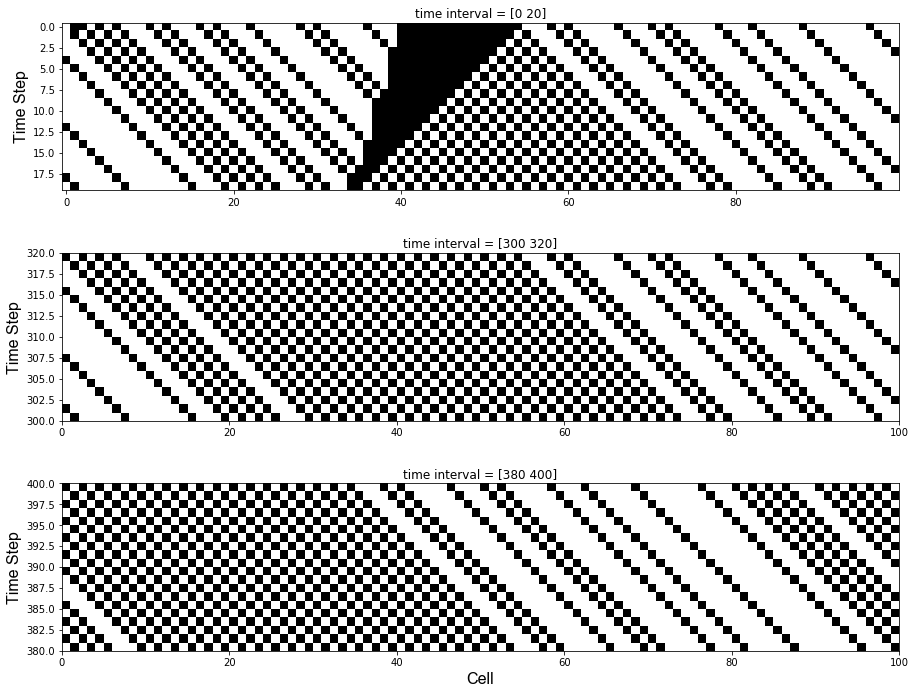

In [3]:
# this is the solution for part 2) 


# define the size of the road 
N = 100
# define the number of time steps
T = 400
# form the array R and make its elements initially zero
R= np.zeros([N, T + 1], dtype = int)

# Define the initial condition
# first derive the set of prime number up to N
PrimeNums = [x for x in range(2,N+1) if not [t for t in range(2,x) if not x%t]]
# seond derive the set numbers in the intervel (40,55].
Between40n55 = [x for x in range(1,N+1) if (x>40)and(x<=55)]
# find the indices of the cells that are initially filled by cars as the union of the prime numbers and (40,55].
InitIndices = sorted(PrimeNums+Between40n55);
# fill the zeroth column of R using "InitIndices"
for i in InitIndices:
    R[i-1,0]  = 1 # note the road is indexed from 1 to N, whereas R[:,0] is indexed from 0 to N-1

# loop over time steps and update R
for i in range(T):
    R[:,i+1] = updateR(R[:,i])

# print out the state of the road at the final time step    
print(R[:,-1])


# this is the solution for part 3)

import matplotlib.pyplot as plt
# import the colormap (cm) so you can use black and white colors in imshow
import matplotlib.cm as cm 

# adjust the size of figure
plt.rcParams['figure.figsize'] = [15, 12]
# define the figure and its axes
fig, (ax1, ax2, ax3) = plt.subplots(3)

# the checkerboard-like plot for the time interval of [0 20]
ax1.set_title('time interval = [0 20]')
ax1.imshow(R[:,0:20].T,cmap='Greys')
ax1.set_ylabel('Time Step',{'fontname':'Arial', 'size':'16'})   
# the checkerboard-like plot for the time interval of [300 320]
ax2.set_title('time interval = [300 320]')
ax2.imshow(R[:,300:320].T,cmap='Greys',extent=[0,N,300,320])
ax2.set_ylabel('Time Step',{'fontname':'Arial', 'size':'16'})   
# the checkerboard-like plot for the time interval of [380 400]
ax3.set_title('time interval = [380 400]')
ax3.imshow(R[:,380:400].T,cmap='Greys',extent=[0,N,380,400])
ax3.set_ylabel('Time Step',{'fontname':'Arial', 'size':'16'})   
ax3.set_xlabel('Cell',{'fontname':'Arial', 'size':'16'})

plt.show()

### Discussion 

Comparing the resutls of the intervals [300 320] and [380 400], we find that the cars do reach a steady state. The entire road is just shifting one cell forward in each time steps. Note that the first plot, when the road is still in its transient phase, is different from the other two plots. 

At the end, each car is moving one cell forward in each time step. Therefore, we can conclude the average speed of all cars is 1 cell per steps without any calculations. 

---

### Task 2b - Trajectory of the cars and average velocity

Storing `R[i,t]` at each time step is unnecessarily memory-consuming. Moreover, it is hard to track individual cars through the zeros and ones of `R[i,t]`. Instead, it is more efficient for many purposes to store the trajectories of each car in an array, `Traj[car,t]`, where each row records the trajectory for a different car, with the value in each successive column recording the location at each successive time step. Our next purpose is to use this array to calculate the average velocities of each car. So it is now better not to use the periodic boundary condition immediately, but to store the value of $N+1$ for the car that moves off the last cell (similarly storing the value of $N+2$ instead of 2 etc). For instance, for the 9-cell road shown in the previous figure `Traj` is constructed as below:

$$
\left(\begin{array}{ccc}
1 & 2 & 3 & 3\\
4 & 4 & 4 & 5\\
5 & 5 & 6 & 7\\
6 & 7 & 8 & 9\\
9 & 9 & 10& 11\\
\end{array}\right)
$$

To derive `Traj[:,t+1]` from `Traj[:,t]`, we only need the current column of `R` and not the entire matrix `R[0:N,0:t+1]`. Hence, we are going to only keep the vector `r[0:N]`, which is the current state of the road with empty cells represented by 0 and cells with a car by 1 (i.e. `r=R[:,t]`). Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`. 

Using `Traj[:,t+1]` and [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) you can update `r` more easily. To update `r` from the state at `t` to `t+1` you will need to: 

- start a new array for `r` at `t+1` by filling `r[:]` values as zeros initially
- take each element of `Traj[:,t+1]`
- find the remainder when you divide that element by $N$, call it `j`
- set `r[j-1]=1`.

(Note what is happening here - you are storing the cars in cells 1 up to N in array positions indexed 0 up to N-1).

Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`.   

Using the functions you have written; **`new_position()`**, **`new_updateR()`** and **`ave_vel()`**, complete the following list of tasks:


1) Test your function **`new_position()`** by using the example above.

2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

In [4]:
# the solution of part 1)

import numpy as np
 
def new_position(CurrentPos,r):
    '''
    Function that derives the position of each car in the next time step, given their position in the currect step
    >>> input:
    
    CurrentPos: a vector of size M = the number of cars. Each element is the position of each at the current time 
                If Traj[i,t] shows the position of car i at time t, then CurrentPos = Traj[:,t] 
    r:          a vector of size N = the total number of cells. Each element represents a cell on the road,
                and is 1 if there is a car there and 0 if there is no cars.
    
    >>> output:
    NextPos:    a vector of size M = the number of cars. Each element is the position of each at the next time step
                If Traj[i,t] shows the position of car i at time t, then NextPos = Traj[:,t+1] 
    
    '''
    # M : the number of cars
    M = np.shape(CurrentPos)[0]
    # N : the number of cells
    N = np.shape(r)[0]
    
    NextPos = np.zeros_like(CurrentPos,dtype=int)
    # loop over the cars and check whether or not each car moves forward 
    for n in range(M):
        # j is the position of each car in the cells numbered from 0 to N-1
        # note that if the car is in the last cell this formula automatically puts in the j=-1 instead of N. 
        # hence, takes care of boundary condition automatically
        j = int(CurrentPos[n])%N - 1
        # if the next cell (to the right of the car's cell) is free (=0), add one to the position of the car 
        # otherwise, keep the same position for the next step
        if (r[j]==1)and(r[j+1]==0):
            NextPos[n] = int(CurrentPos[n]+1)
        else:
            NextPos[n] = int(CurrentPos[n])
    return NextPos


def New_updateR(NextPos,N):
    '''
    Function that fills the cells with car in them by 1 
    >>> input:
    NextPos:    a vector of size M = the number of cars at time step t+1
    N:          the total number of cells. 
    
    >>> output:
    r:          updated vector of size N, showing in which cells there are cars and which cells are empty (at t+1).
    
    '''
    # M : the number of cars
    M = np.shape(NextPos)[0]
    # make r zero initially
    r = np.zeros(N,dtype=int)
    # if there is car in the cell j, make it 1
    for n in range(M):
        j = int(NextPos[n])%N - 1
        r[j]=1
    return r

def ave_vel(Traj,t):
    '''
    Function that calculates the velocity of cars at each time step and then averages them
    >>> input:
    Traj:         a vector of size M by T that store the trajectory of each car (the position of cars at each point in time)
    t:            the time step at which the speeds are calculated
    
    >>> output:
    cars_ave_vel:          updated vector of size N, showing in which cells there are cars and which cells are empty (at t+1).
     
    '''
    cars_ave_vel = np.mean(Traj[:,t]-Traj[:,t-1])
    return cars_ave_vel

# define the size of the road 
N = 9
# define the number of time steps
T = 3
# form the inital vector r
r = [1, 0, 0, 1, 1, 1, 0, 0, 1]
# fill the zeroth column of Traj using the initial "r" 
Traj=np.zeros([np.sum(r),T+1], dtype = int)
k = 0
for i in range(len(r)):
    if r[i]==1:
        Traj[k,0]=i+1
        k += 1  

# loop over time steps, dervie new car positions and update R        
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    
print(Traj)

[[ 1  2  3  3]
 [ 4  4  4  5]
 [ 5  5  6  7]
 [ 6  7  8  9]
 [ 9  9 10 11]]


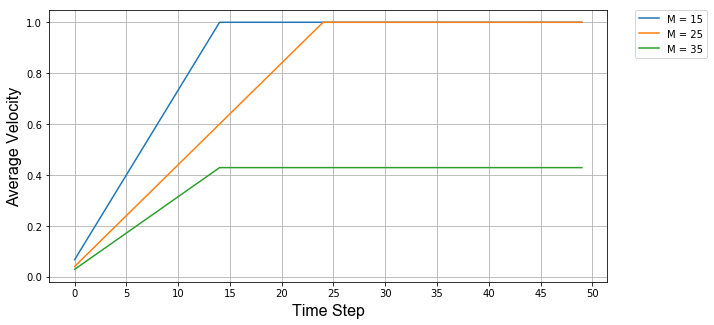

In [5]:
# the solution of part 2) and 3)

import matplotlib.pyplot as plt

# define the size of the road 
N = 50
# define the number of time steps
T = 50


# number of cars for part 2)
M = 15

# produce r and Traj[:,0] based on the initial configurations described in 2)
r = np.zeros(N, dtype = int)
r[0:M]=1
Traj=np.zeros([M,T+1], dtype = int)
k = 0
for i in range(len(r)):
    if r[i]==1:
        Traj[k,0]=i+1
        k += 1
        
# form a vector that stores all the values of average velocity  
Velocity_M15 = np.empty(T)
# loop over time steps and calculated the average velocity at each time step
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    Velocity_M15[i] = ave_vel(Traj,i+1)

# repeart the previous part for M=25, part 3)
M = 25
r = np.zeros(N, dtype = int)
r[0:M]=1
Traj=np.zeros([M,T+1], dtype = int)
k = 0
for i in range(len(r)):
    if r[i]==1:
        Traj[k,0]=i+1
        k += 1
        
Velocity_M25 = np.empty(T)        
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    Velocity_M25[i] = ave_vel(Traj,i+1)
    
# repeart the previous part for M=35, part 3)
M = 35
r = np.zeros(N, dtype = int)
r[0:M]=1
Traj=np.zeros([M,T+1], dtype = int)
k = 0
for i in range(len(r)):
    if r[i]==1:
        Traj[k,0]=i+1
        k += 1
        
Velocity_M35 = np.empty(T)        
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    Velocity_M35[i] = ave_vel(Traj,i+1)
    

plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Time Step',{'fontname':'Arial', 'size':'16'})
plt.ylabel('Average Velocity',{'fontname':'Arial', 'size':'16'})                            
plt.plot(Velocity_M15,label="M = 15")
plt.plot(Velocity_M25,label="M = 25")
plt.plot(Velocity_M35,label="M = 35")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.rc('legend', fontsize='16')
plt.rc('xtick', labelsize='14') 
plt.xticks(np.arange(0, 51, 5))
plt.rc('ytick', labelsize='14')    # fontsize of the tick labels
plt.grid(True)
plt.show()

For M=15 and M=35, the steady state is reached after 14 time steps, whereas for M=25 the steady state is reached after 24 time steps. If there are less than or equal to N/2 cars on the road, they reach the final speed of 1 step per cell where there is a free space in front of each car at each step to go forward. For more than N/2 cars, a part of road always stay congested and the final average speed becomes smaller than 1 step per cell.

(Note for the markers: depending on if the student is using forward or backward differentiation in time, the time step at which steady state is reached might different by one. Please, give them the full mark in this case.)

4) Does the average speed of the cars depend on their initial configuration? To answer this question, initally fill $M = 20$ cars in $N=50$ cells in three different ways:

a) Fill the first 20 cells with 20 cars.

b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,... 

Plot the average speed of the cars as a function of time up to $T=50$ for each case and discuss the results.

5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

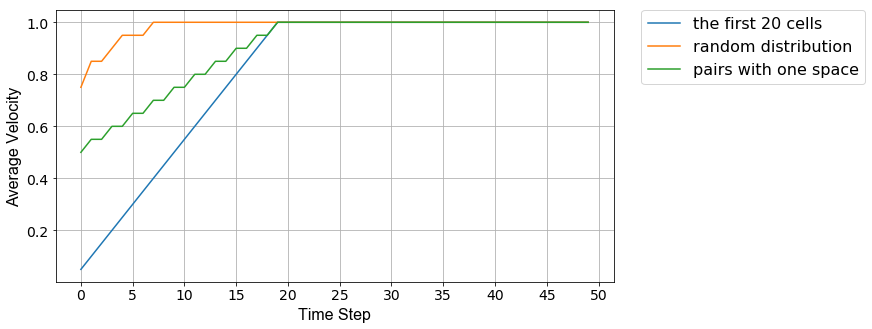

In [6]:
# solution to part 4)
import random
import matplotlib.pyplot as plt

N = 50
T = 50
M = 20

# configuration a) filling the first 20 cells with 20 cars
r = np.zeros(N, dtype = int)
r[0:M]=1
Traj=np.zeros([M,T+1], dtype = int)
k = 0
for i in range(len(r)):
    if r[i]==1:
        Traj[k,0]=i+1
        k += 1
        
speeds_a = np.empty(T)      
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    speeds_a[i] = ave_vel(Traj,i+1)
    
# configuration b) randomly distributing the cars
Traj=np.zeros([M,T+1], dtype = int)
r = np.zeros(N, dtype = int)
InitRandom=random.sample(range(0,N),M)
InitRandom.sort()
Traj[:,0]=np.array(InitRandom)+1
r[InitRandom]=1
speeds_b = np.empty(T)      
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    speeds_b[i] = ave_vel(Traj,i+1)

# configuration c) pairs with one space distance
Traj=np.zeros([M,T+1], dtype = int)
r = np.zeros(N, dtype = int)
pairs = [x for x in range(1,N+1) if x%3!=0]
pairs0 = [x-1 for x in range(1,N+1) if x%3!=0]
Traj[:,0]=pairs[0:M]
r[pairs0[0:M]]=1
speeds_c = np.empty(T)      
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    speeds_c[i] = ave_vel(Traj,i+1)


plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Time Step',{'fontname':'Arial', 'size':'16'})
plt.ylabel('Average Velocity',{'fontname':'Arial', 'size':'16'})   
plt.plot(speeds_a,label="the first 20 cells")
plt.plot(speeds_b,label="random distribution")
plt.plot(speeds_c,label="pairs with one space")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.rc('legend', fontsize='16')
plt.rc('xtick', labelsize='14') 
plt.xticks(np.arange(0, 51, 5))
plt.rc('ytick', labelsize='14') 
plt.grid(True)
plt.show()

All the initial cofigurations reach the same final speed which is 1 cell per step. However, they reach the steady state slower or faster than the others. If the cars are all in consecutive cells initially, it will take them more time to reach their final speed. If the cars are more evenly distributed across the road, they can reach their steady state faster. We expect the random distribution to put the cars more evenly on the road.

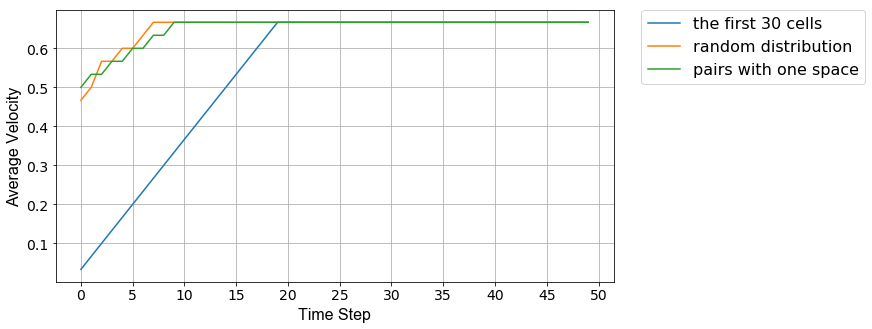

In [7]:
# solution to part 5)
import random
import matplotlib.pyplot as plt

N = 50
T = 50
M = 30

# configuration a) filling the first 20 cells with 20 cars
r = np.zeros(N, dtype = int)
r[0:M]=1
Traj=np.zeros([M,T+1], dtype = int)
k = 0
for i in range(len(r)):
    if r[i]==1:
        Traj[k,0]=i+1
        k += 1
        
speeds_a = np.empty(T)      
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    speeds_a[i] = ave_vel(Traj,i+1)
    
# configuration b) randomly distributing the cars
Traj=np.zeros([M,T+1], dtype = int)
r = np.zeros(N, dtype = int)
InitRandom=random.sample(range(0,N),M)
InitRandom.sort()
Traj[:,0]=np.array(InitRandom)+1
r[InitRandom]=1
speeds_b = np.empty(T)      
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    speeds_b[i] = ave_vel(Traj,i+1)

# configuration c) pairs with one space distance
Traj=np.zeros([M,T+1], dtype = int)
r = np.zeros(N, dtype = int)
pairs = [x for x in range(1,N+1) if x%3!=0]
pairs0 = [x-1 for x in range(1,N+1) if x%3!=0]
Traj[:,0]=pairs[0:M]
r[pairs0[0:M]]=1
speeds_c = np.empty(T)      
for i in range(T):
    Traj[:,i+1]=new_position(Traj[:,i],r)
    r=New_updateR(Traj[:,i+1],N)
    speeds_c[i] = ave_vel(Traj,i+1)


plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Time Step',{'fontname':'Arial', 'size':'16'})
plt.ylabel('Average Velocity',{'fontname':'Arial', 'size':'16'})   
plt.plot(speeds_a,label="the first 30 cells")
plt.plot(speeds_b,label="random distribution")
plt.plot(speeds_c,label="pairs with one space")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.rc('legend', fontsize='16')
plt.rc('xtick', labelsize='14') 
plt.xticks(np.arange(0, 51, 5))
plt.rc('ytick', labelsize='14') 
plt.grid(True)
plt.show()

This time, because we have two many cars (M>N/2), the steady state velocity is smaller than 1 cell per step, but all the distributations reach the same final velocity. Just like M=20, if we put all the cars together, it will take them more time to reach the steady state. Unlike M=20, the pairs of cars and random distributation reach the steady state at similar times since they are both evenly distributed on the entire road.

6) How does the number of cars affect the final average speed? In other words, we want to see how traffic fluidity depends on how busy the road is. Use `scipy.stats.bernoulli.rvs(p, size=N) ` to fill each cell in the inital configuration (see workshop 5 if you are not familiar with this function). This means the chance of having a car in a cell is `p`.  Therefore, if `N` is large enough, you expect to have `N*p` cars on the road. Set $N=800$, vary `p` from $0.2$ to $0.8$, and plot the average speed of cars at `T=200` as a function of `p`. Comment on the results. How does the number of cars affect their final average speed?

7) Repeat the last question for $N=50$ and $N = 2000$. Do the results change? Why?

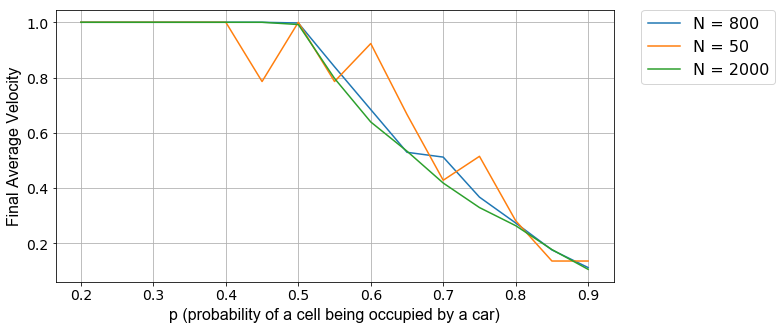

In [8]:
# solution to part 6)
import scipy
from scipy.stats import bernoulli

N = 800
T = 200
all_p = [.2+x*.05 for x in range(15)]
finalspeed800 = []
for p in all_p:
    r = scipy.stats.bernoulli.rvs(p, size=N)
    Traj=np.zeros([np.sum(r),T+1], dtype = int)
    k = 0
    for i in range(len(r)):
        if r[i]==1:
            Traj[k,0]=i+1
            k += 1        
    for i in range(T):
        Traj[:,i+1]=new_position(Traj[:,i],r)
        r=New_updateR(Traj[:,i+1],N)

    finalspeed800.append(ave_vel(Traj,T))

N = 50
T = 200
all_p = [.2+x*.05 for x in range(15)]
finalspeed50 = []
for p in all_p:
    r = scipy.stats.bernoulli.rvs(p, size=N)
    Traj=np.zeros([np.sum(r),T+1], dtype = int)
    k = 0
    for i in range(len(r)):
        if r[i]==1:
            Traj[k,0]=i+1
            k += 1        
    for i in range(T):
        Traj[:,i+1]=new_position(Traj[:,i],r)
        r=New_updateR(Traj[:,i+1],N)

    finalspeed50.append(ave_vel(Traj,T))

N = 2000
T = 200
all_p = [.2+x*.05 for x in range(15)]
finalspeed2000 = []
for p in all_p:
    r = scipy.stats.bernoulli.rvs(p, size=N)
    Traj=np.zeros([np.sum(r),T+1], dtype = int)
    k = 0
    for i in range(len(r)):
        if r[i]==1:
            Traj[k,0]=i+1
            k += 1        
    for i in range(T):
        Traj[:,i+1]=new_position(Traj[:,i],r)
        r=New_updateR(Traj[:,i+1],N)

    finalspeed2000.append(ave_vel(Traj,T))
    
    
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(all_p,finalspeed800,label="N = 800")
plt.plot(all_p,finalspeed50,label="N = 50")
plt.plot(all_p,finalspeed2000,label="N = 2000")
plt.xlabel('p (probability of a cell being occupied by a car)',{'fontname':'Arial', 'size':'16'})
plt.ylabel('Final Average Velocity',{'fontname':'Arial', 'size':'16'})  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

If $p<0.5$, almost less than half of the cells are filled by cars. In this case, the final speed will be 1 cell per step as all the cars eventually find one free cell in front of them. If you increase T, you will see that for N=800 and N=2000, the final speed is exactly 1 up to $p=0.5$. For $p>0.5$, a part of road remains congested and the size of congested part increases with p. Hence, the final speed decreases proportionally.

The results for N=800 and N=2000 are similar as our sample is big enough to have reliable statistics. However, N=50 is too small and the results are dependent on the number of cells. Yet the overal behaviours of all cases are similar.

---

### Task 2c - Fast and slow cars

Now imagine there are two types of cars on our road: fast cars who want to move with the speed of 2 cells per step if there are enough spaces in front of them, and the slow cars who always move with the speed of 1 cell per step as in the previous task. If there are less than two free cells in front of the fast cars, they either move one cell per step or don't move at all (like slow cars).

1) Numbering your cells from $1$ to $N=100$, put all fast cars initially in the prime indexed cells and the cells in the interval $(60,85]$. Now plot the position of the cars in the time interval $t=[0, 60]$. Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?

(You will find it helpful to construct a new function to help **`new_position2(r,Traj,Vel)`**, where the new vector `Vel` stores the velocity of each car).

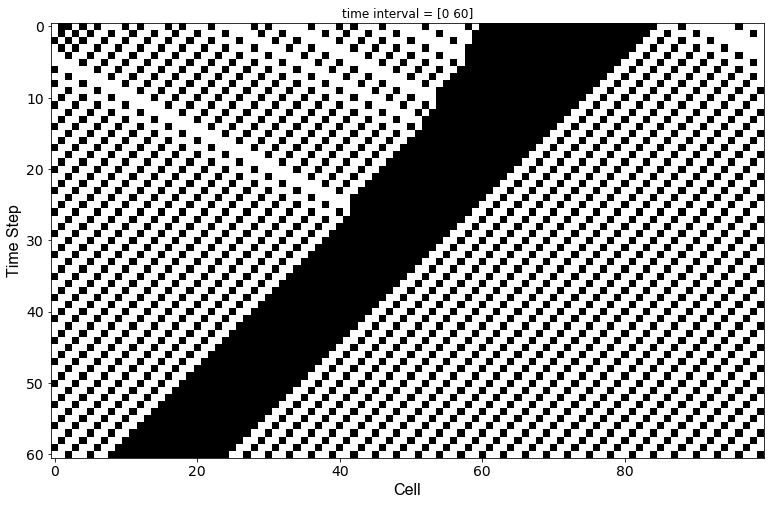

In [9]:
def new_position2(CurrentPos,r,Vel):
    '''
    This Function is similar to new_position()
    which derives the position of cars in the next time step, given their position in the currect step
    However, it considers their velocity!
    >>> input:
    
    CurrentPos: a vector of size M = the number of cars. Each element is the position of each at the current time 
                If Traj[i,t] shows the position of car i at time t, then CurrentPos = Traj[:,t] 
    r:          a vector of size N = the total number of cells. Each element represents a cell on the road,
                and is 1 if there is a car there and 0 if there is no cars.
    Vel:        the velocity of each car (which is either 1 or 2). Each row of Vel corresponds to the car are in each row of CurrentPos            
    
    >>> output:
    NextPos:    a vector of size M = the number of cars. Each element is the position of each at the next time step
                If Traj[i,t] shows the position of car i at time t, then NextPos = Traj[:,t+1] 
    
    '''
    N = np.shape(r)[0]
    M = np.shape(CurrentPos)[0]
    NextPos = np.zeros_like(CurrentPos,dtype=int)
    for n in range(M):
        j = int(CurrentPos[n])%N - 1
        jplus1 = int(CurrentPos[n]+1)%N - 1
        jplus2 = int(CurrentPos[n]+2)%N - 1
        if (r[j]==1)and(r[jplus1]==0):     
            if (Vel[n]==2)and(r[jplus2]==0):
                NextPos[n] = int(CurrentPos[n]+2)
            else:
                NextPos[n] = int(CurrentPos[n]+1)                              
        else:
            NextPos[n] = int(CurrentPos[n])
    return NextPos

T = 60
N = 100
r = np.zeros(N, dtype = int)
All_R = np.zeros([N,T+1], dtype = int)
primenumbers = [x for x in range(2,N+1) if not [t for t in range(2,x) if not x%t]]
between40n55 = [x for x in range(1,N+1) if (x>60)and(x<=85)]
InitConf = sorted(primenumbers+between40n55)
Traj=np.zeros([len(InitConf),T+1], dtype = int)
# define the velocity vector which does not change in the simulation
Vel = 2*np.ones(len(InitConf), dtype = int)
Traj[:,0]= InitConf
for i in InitConf:
    r[i-1]= 1
    
All_R[:,0]= r   
for i in range(T):
        Traj[:,i+1]=new_position2(Traj[:,i],r,Vel)
        r=New_updateR(Traj[:,i+1],N)  
        All_R[:,i+1] = r
        
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax1 = plt.subplots(1)
ax1.set_title('time interval = [0 60]')
ax1.imshow(All_R.T,cmap='Greys') 
ax1.set_ylabel('Time Step',{'fontname':'Arial', 'size':'16'})   
ax1.set_xlabel('Cell',{'fontname':'Arial', 'size':'16'})


plt.show()

Yes, a part of road stays congested forever. This part moves backward with the speed of one cell per step.

2) Now put fast cars initially in the prime indexed cells only like those in the last question, but this time make the last car (in cell 97) slow (i.e. moving only one cell per step). How does this car affect the whole traffic flow?

3) By running the simulation up to $T = 100$, calculate the average velocity of the cars at this final time.

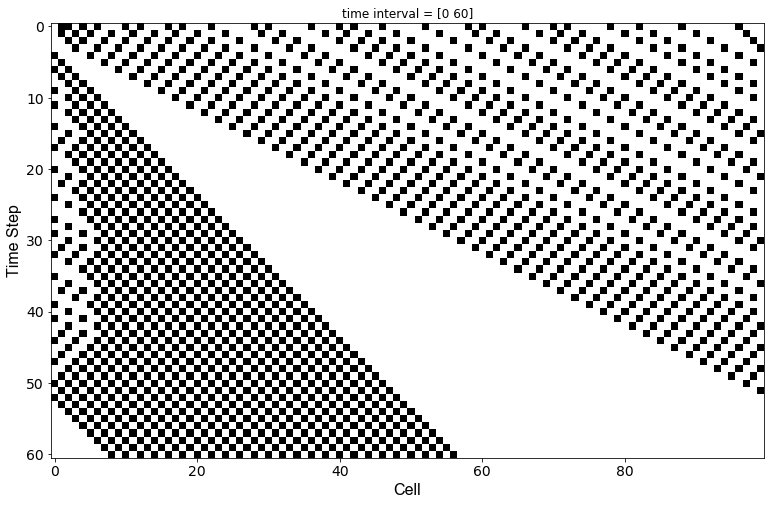

the final average speed at T=100 is 1.0 cell per step


In [10]:
T = 60
N = 100
r = np.zeros(N, dtype = int)
All_R = np.zeros([N,T+1], dtype = int)
primenumbers = [x for x in range(2,N+1) if not [t for t in range(2,x) if not x%t]]
InitConf = sorted(primenumbers)
Traj=np.zeros([len(InitConf),T+1], dtype = int)
# define the velocity vector which does not change in the simulation
Vel = 2*np.ones(len(InitConf), dtype = int)
Vel[-1] = 1
Traj[:,0]= InitConf
for i in InitConf:
    r[i-1]=1
All_R[:,0]= r   
for i in range(T):
        Traj[:,i+1]=new_position2(Traj[:,i],r,Vel)
        r=New_updateR(Traj[:,i+1],N)  
        All_R[:,i+1] = r
        
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax1 = plt.subplots(1)
ax1.set_title('time interval = [0 60]')
ax1.imshow(All_R.T,cmap='Greys') 
ax1.set_ylabel('Time Step',{'fontname':'Arial', 'size':'16'})   
ax1.set_xlabel('Cell',{'fontname':'Arial', 'size':'16'})


plt.show()

T=100
Traj=np.zeros([len(InitConf),T+1], dtype = int)
for i in range(T):
        Traj[:,i+1]=new_position2(Traj[:,i],r,Vel)
        r=New_updateR(Traj[:,i+1],N)  
        
print('the final average speed at T=100 is', ave_vel(Traj,T),'cell per step')

The one slow car eventually slows down all the fast cars and makes the final average speed 1 cell per step.